## Data preparation and data visualization

### Import packages

In [134]:
import pandas as pd

In [135]:
import matplotlib.pyplot as plt

In [136]:
purch_behav_data = pd.read_csv("../src/data/QVI_purchase_behaviour.csv")

In [137]:
qvi_tran_data = pd.read_excel("../src/data/QVI_transaction_data.xlsx")

In [138]:
def data_info(file):
    print("There are {} rows and {} columns.".format(file.shape[0], file.shape[1]), end = '\n')
    print("-------------head of the data------------------")
    print(file.head(5))
    print("-------------description of the data------------------")
    print(file.describe(include = "all"))

### Based on this table, we can figure out that quantium customers mainly have<font color = 'red'> 7</font> different lifestage and <font color ="red">3 </font> types of customer segments. And customers who are in the lifestage of <span style="color:red">retirees</span>  or <span style="color:red">mainstream</span> customer segments have the highest number of consumption

In [139]:
data_info(purch_behav_data)

There are 72637 rows and 3 columns.
-------------head of the data------------------
   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream
-------------description of the data------------------
        LYLTY_CARD_NBR LIFESTAGE PREMIUM_CUSTOMER
count     7.263700e+04     72637            72637
unique             NaN         7                3
top                NaN  RETIREES       Mainstream
freq               NaN     14805            29245
mean      1.361859e+05       NaN              NaN
std       8.989293e+04       NaN              NaN
min       1.000000e+03       NaN              NaN
25%       6.620200e+04       NaN              NaN
50%       1.340400e+05       NaN              NaN
75%    

Based on the followed tables, we can know the most popular product is <font color = "red"> Kettle Mozzarella   Basil & Pesto 175g </font> and it is bought by 3304 times. There are 114 kinds of products. For a single product the max number of quantity is <font color="red">200</font>. The average total sales is <font color ="red">7.30</font>.
For stores, the 226 number store has the highest shopping times and it is 2022.

In [140]:
qvi_tran_data[['STORE_NBR','PROD_NBR']] = qvi_tran_data[['STORE_NBR','PROD_NBR']].astype('category')
qvi_tran_data[['DATE']] = pd.to_datetime(qvi_tran_data['DATE'],origin=pd.Timestamp('1899-12-30'))

data_info(qvi_tran_data)

There are 264836 rows and 8 columns.
-------------head of the data------------------
                           DATE STORE_NBR  LYLTY_CARD_NBR  TXN_ID PROD_NBR  \
0 1899-12-30 00:00:00.000043390         1            1000       1        5   
1 1899-12-30 00:00:00.000043599         1            1307     348       66   
2 1899-12-30 00:00:00.000043605         1            1343     383       61   
3 1899-12-30 00:00:00.000043329         2            2373     974       69   
4 1899-12-30 00:00:00.000043330         2            2426    1038      108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  
-------------description of the data--------

In [181]:
prod_name_list = qvi_tran_data['PROD_NAME'].unique().tolist()
from functools import reduce
prod_name_list = reduce(lambda x,y: x +y,list(map(lambda x: [i for i in x.split(' ') if i != ''],prod_name_list)))
              

In [186]:
from itertools import accumulate
list(accumulate([1,2,3,4,5],lambda x,y: x+y))

[1, 3, 6, 10, 15]

In [122]:
lifestages = purch_behav_data['LIFESTAGE'].unique()
print("The 7 lifestages are:", lifestages)

The 7 lifestages are: ['YOUNG SINGLES/COUPLES' 'YOUNG FAMILIES' 'OLDER SINGLES/COUPLES'
 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES' 'OLDER FAMILIES' 'RETIREES']


In [126]:
qvi_tran_data.STORE_NBR

0           1
1           1
2           1
3           2
4           2
         ... 
264831    272
264832    272
264833    272
264834    272
264835    272
Name: STORE_NBR, Length: 264836, dtype: category
Categories (272, int64): [1, 2, 3, 4, ..., 269, 270, 271, 272]

In [129]:
qvi_tran_data[qvi_tran_data["STORE_NBR"]==226].count()

DATE              2022
STORE_NBR         2022
LYLTY_CARD_NBR    2022
TXN_ID            2022
PROD_NBR          2022
PROD_NAME         2022
PROD_QTY          2022
TOT_SALES         2022
dtype: int64

In [7]:
prem_cust = purch_behav_data['PREMIUM_CUSTOMER'].unique()

In [8]:
print('The 3 different premium customers are:',prem_cust)

The 3 different premium customers are: ['Premium' 'Mainstream' 'Budget']


In [9]:
purch_behav_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


### We don't have null value.

In [15]:
purch_behav_data['LYLTY_CARD_NBR'].value_counts()

2047      1
197109    1
121326    1
119279    1
74225     1
         ..
251088    1
77007     1
81101     1
79052     1
131072    1
Name: LYLTY_CARD_NBR, Length: 72637, dtype: int64

In [31]:
lifestage =purch_behav_data['LIFESTAGE'].value_counts()

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

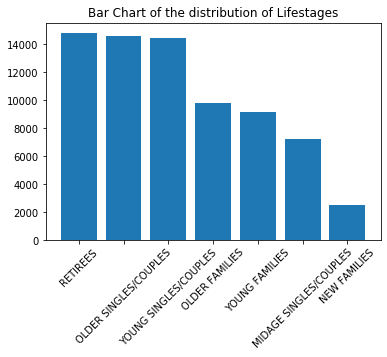

In [42]:
plt.bar(lifestage.index, lifestage )
plt.title("Bar Chart of the distribution of Lifestages")
plt.xticks(rotation = 45)

In [21]:
cust_segs = purch_behav_data['PREMIUM_CUSTOMER'].value_counts()

Text(0.5, 1.0, 'Bar Chart of the distribution of Customer Segments')

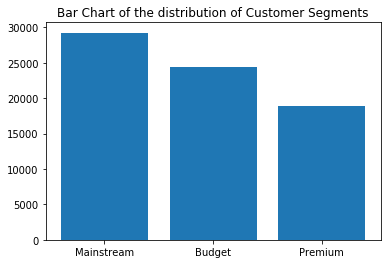

In [41]:
plt.bar(cust_segs.index, cust_segs)
plt.title("Bar Chart of the distribution of Customer Segments")
